# 가우시안 분포 따르는 2차원 데이터 생성

In [127]:
import numpy as np

In [128]:
np.random.seed(50)  # 동일한 수열 발생 위해 설정
row_count = 50
# row_count = 1000

## 데이터 A 종류

In [129]:
mean_1 = np.array([3,5])
mean_1, mean_1.shape, type(mean_1)

(array([3, 5]), (2,), numpy.ndarray)

In [130]:
# sigma_1 = np.array([[1,1],[1,2]])
sigma_1 = np.array([[3,1],[1,4]])   # 식별 위해 값 분포 임의 폭 증가
sigma_1, sigma_1.shape, type(sigma_1)

(array([[3, 1],
        [1, 4]]), (2, 2), numpy.ndarray)

In [131]:
rand_std_1 = np.random.randn(row_count, 2)
# rand_std_1, 
rand_std_1.shape, type(rand_std_1)

((50, 2), numpy.ndarray)

In [132]:
# type(rand_std_1), type(sigma_1), type(mean_1)

In [133]:
# rand_std_1.shape, sigma_1.shape, mean_1.shape

In [134]:
class_A = rand_std_1 @ np.sqrt(sigma_1) + mean_1 # 공분산 적용 분포 구하기

## 데이터 B 종류

In [135]:
mean_2 = np.array([5,3])
# sigma_2 = np.array([[1,1],[1,2]])
sigma_2 = np.array([[3,1],[1,4]])   # 식별 위해 값 분포 임의 폭 증가
rand_std_2 = np.random.randn(row_count, 2)
class_B = rand_std_2 @ np.sqrt(sigma_2) + mean_2
class_B.shape

(50, 2)

## Plot 그리기

In [136]:
import matplotlib.pyplot as plt

In [137]:
# class_B[:,0]
# mean_1[0]

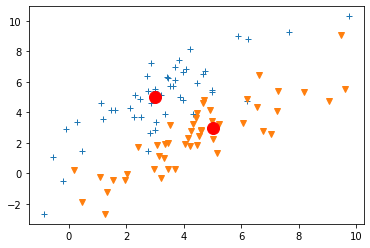

In [138]:
from matplotlib.markers import MarkerStyle
plt.plot(class_A[:,0],class_A[:,1],marker='+',linestyle='None') # 데이터 A
plt.plot(mean_1[0],mean_1[1],'o',ls='None', color='red', markersize=12) # 데이터 A 평균
plt.plot(class_B[:,0],class_B[:,1],'v')  # 데이터 B
plt.plot(mean_2[0],mean_2[1],'o',color='red', ms=12)  # 데이터 B 평균
# plt.plot(range(11)) # 예상할 수 있는 선형 경계

# 결정경계 : 새로운 값 판단 위한 분기선
- 여기선 각 데이터 class 평균과 거리 사용 측정 방식

In [139]:
class_A_mean = np.mean(class_A,axis=0)
class_A_cov = np.cov(class_A.T)
class_A_mean, class_A_cov

(array([3.20902787, 4.98402174]), array([[3.96764102, 3.83332394],
        [3.83332394, 5.72462042]]))

In [140]:
class_B_mean = np.mean(class_B,axis=0)
class_B_cov = np.cov(class_B.T)
class_A_mean, class_A_cov

(array([3.20902787, 4.98402174]), array([[3.96764102, 3.83332394],
        [3.83332394, 5.72462042]]))

In [141]:
# 예측할려고 하는 새로운 값
new_data_02 = np.array([3,1])
new_data_02, type(new_data_02), new_data_02.shape, new_data_02[0],new_data_02[1],

(array([3, 1]), numpy.ndarray, (2,), 3, 1)

In [142]:
# 예측할려고 하는 새로운 값
new_data_01 = np.array([8,9])
new_data_01, type(new_data_01), new_data_01.shape, new_data_01[0],new_data_01[1],

(array([8, 9]), numpy.ndarray, (2,), 8, 9)

## 그래프로 판단


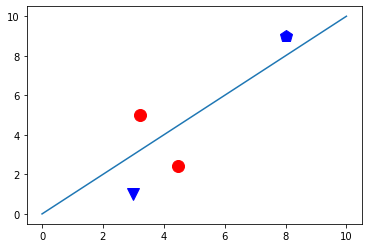

In [143]:
plt.plot(range(11))
plt.plot(class_A_mean[0],class_A_mean[1],'o',color='red', ms=12)  # 데이터 A 평균
plt.plot(class_B_mean[0],class_B_mean[1],'o',color='red', ms=12)  # 데이터 B 평균
plt.plot(new_data_01[0],new_data_01[1],'p',color='blue', ms=12)  # 데이터 A 평균
plt.plot(new_data_02[0],new_data_02[1],'v',color='blue', ms=12)  # 데이터 B 평균
plt.show()

### 판별함수(discriminant function)로 판단
$
g(x) = d(x, m_2) - d(x, m_1) = 0 \\
= (x-m_1)^T(x-m_1) - (x-m_2)^T(x-m_2) \\
= -2(m_1-m_2)^Tx + m_1^Tm_1-m_2^T
$
### 클래스 라벨
$
y(x) = \left\{
        \begin{array}{cl}
        1 & if & g(x) > 0 & >> 데이터 A\\
        -1 & if & g(x) < 0 & >> 데이터 B 
        \end{array}
        \right.
$

$g(x) = -2(m_1-m_2)^Tx + m_1^Tm_1-m_2^T $ -> 정확히 못 풀었음.

In [144]:
# first_vec = (class_A_mean - class_B_mean).T
# first_vec, type(first_vec), first_vec.shape

In [145]:
# second_vec = (class_A_mean.T * class_A_mean) - class_A_mean.T
# second_vec, type(second_vec), second_vec.shape

In [146]:
# result_vec = (-2*first_vec*new_data_02) + second_vec
# result_vec

In [147]:
# np.linalg.norm(result_vec)

$𝑔(𝑥)=𝑑(𝑥,𝑚2)−𝑑(𝑥,𝑚1)$

In [149]:
np.linalg.norm(new_data_01-class_B_mean) - np.linalg.norm(new_data_01-class_A_mean) # class A

1.2173067711404641

In [148]:
np.linalg.norm(new_data_02-class_B_mean) - np.linalg.norm(new_data_02-class_A_mean) # class B

-1.952180179204856

# 성능평가

### 평균 거리 이용

In [150]:
class_A_error_count, class_B_error_count = 0, 0
for idx in range(row_count):
  distance_A = np.linalg.norm(class_A[idx] - class_A_mean) - np.linalg.norm(class_A[idx] - class_B_mean)
  if distance_A > 0 :
    class_A_error_count += 1
  distance_B = np.linalg.norm(class_B[idx] - class_A_mean) - np.linalg.norm(class_B[idx] - class_B_mean)
  if distance_B < 0 :
    class_B_error_count += 1    

(class_A_error_count + class_B_error_count) / row_count, class_A_error_count, class_B_error_count, 

(0.28, 9, 5)

# try on it
샘플 갯수 증가하면, 성능 좋아짐.(row_count=1000 --> 약 0.28)